<a href="https://colab.research.google.com/github/archisha13/Face-Recognition-App/blob/main/FaceRecognitionApp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install opencv-python 

In [ ]:
# !pip install tensorflow matplotlib numpy pandas

In [ ]:
import cv2

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# !pip install os-sys

In [ ]:
import random
import os

In [ ]:
# Import tensorflow dependencies - Functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

Using Tensorflow functional API
Building Siamese Neural Network
which does one shot classification
we can take 2 images and classify whether two images are same

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import pandas as pd
# df =pd.read_csv("/content/drive/MyDrive/data")
# df.head()

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

image captured is anchor
does anchor match positive image then op 1


In [ ]:
# Setup paths
POS_PATH = "/content/drive/MyDrive/data/positive"
NEG_PATH = "/content/drive/MyDrive/data/negative"
ANC_PATH = "/content/drive/MyDrive/data/anchor"

In [ ]:
# # Make the directories
# os.makedirs(POS_PATH)
# os.makedirs(NEG_PATH)
# os.makedirs(ANC_PATH)

In [ ]:
POS_PATH

'/content/drive/MyDrive/data/positive'

In [ ]:
# # Uncompress Tar GZ Labelled Faces in the Wild Dataset
# !tar -xf lfw.tgz

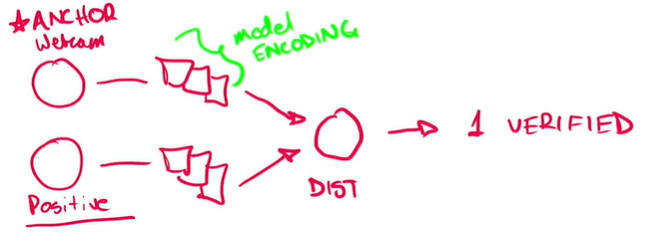

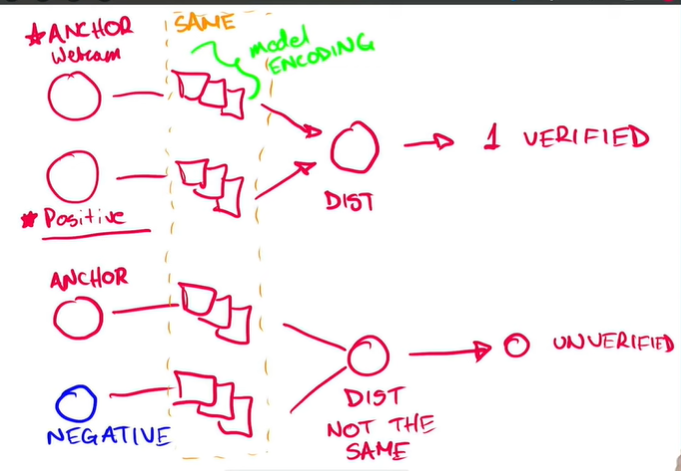

In [ ]:
# # Move LFW Images to the following repository data/negative
# for directory in os.listdir('lfw'):
#     for file in os.listdir(os.path.join('lfw', directory)):
#         EX_PATH = os.path.join('lfw', directory, file)
#         NEW_PATH = os.path.join(NEG_PATH, file)
#         os.replace(EX_PATH, NEW_PATH)

In [ ]:
# os.listdir('lfw')

In [ ]:
## images are of 250x250
# Import uuid library to generate unique image names
import uuid

In [ ]:
# uuid?

In [ ]:
# os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))

In [ ]:
# cap = cv2.VideoCapture(0)

# while cap.isOpened(): 
#     ret, frame = cap.read()
    
#       # Cut down frame to 250x250px
#     frame = frame[120:120+250,200:200+250, :]
#     # all color channels from 120 it will start
    
#     # Show image back to screen
#     cv2.imshow('Image Collection', frame)
    
#     # Breaking gracefully
#     if cv2.waitKey(1) & 0XFF == ord('q'):
#         break
        
# # Release the webcam
# cap.release()
# # Close the image show frame
# cv2.destroyAllWindows()

In [ ]:
# # Establish a connection to the webcam
# cap = cv2.VideoCapture(0)
# while cap.isOpened(): 
#     ret, frame = cap.read()
   
#     # Cut down frame to 250x250px
#     frame = frame[120:120+250,200:200+250, :]
#     # all color channels from 120 it will start
    
#     # Collect anchors 
#     if cv2.waitKey(1) & 0XFF == ord('a'):
#         # Create the unique file path 
#         imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
#         # Write out anchor image
#         cv2.imwrite(imgname, frame)
    
#     # Collect positives
#     if cv2.waitKey(1) & 0XFF == ord('p'):
#         # Create the unique file path 
#         imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
#         # Write out positive image
#         cv2.imwrite(imgname, frame)
    
#     # Show image back to screen
#     cv2.imshow('Image Collection', frame)
    
#     # Breaking gracefully
#     if cv2.waitKey(1) & 0XFF == ord('q'):
#         break
        
# # Release the webcam
# cap.release()
# # Close the image show frame
# cv2.destroyAllWindows()

In [ ]:
# plt.imshow(frame[120:120+250,200:200+250, :])

In [ ]:
###PART 3
# TENSORFLOW DATA LOADER

In [ ]:
def data_aug(img):
    data = []
    for i in range(9):
        img = tf.image.stateless_random_brightness(img, max_delta=0.02, seed=(1,2))
        img = tf.image.stateless_random_contrast(img, lower=0.6, upper=1, seed=(1,3))
        # img = tf.image.stateless_random_crop(img, size=(20,20,3), seed=(1,2))
        img = tf.image.stateless_random_flip_left_right(img, seed=(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_jpeg_quality(img, min_jpeg_quality=90, max_jpeg_quality=100, seed=(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_saturation(img, lower=0.9,upper=1, seed=(np.random.randint(100),np.random.randint(100)))
            
        data.append(img)
    
    return data

In [ ]:
# img_path = os.path.join(ANC_PATH, '924e839c-135f-11ec-b54e-a0cec8d2d278.jpg')
# img = cv2.imread(img_path)
# augmented_images = data_aug(img)

# for image in augmented_images:
#     cv2.imwrite(os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())

In [ ]:
# for file_name in os.listdir(os.path.join(POS_PATH)):
#     img_path = os.path.join(POS_PATH, file_name)
#     img = cv2.imread(img_path)
#     augmented_images = data_aug(img) 
    
#     for image in augmented_images:
#         cv2.imwrite(os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())

In [ ]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'/*.jpg').take(300)
positive = tf.data.Dataset.list_files(POS_PATH+'/*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH+'/*.jpg').take(300)

In [ ]:
dir_test = anchor.as_numpy_iterator()

In [ ]:
print(dir_test.next())

b'/content/drive/MyDrive/data/anchor/d42e2cd6-b5fd-11ed-8d17-97e548441b72.jpg'


PREPRROCESSING FUN


In [ ]:
def preprocess(file_path):
    
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image 
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1 
    img = img / 255.0

    # Return image
    return img

In [ ]:
img = preprocess('/content/drive/MyDrive/data/anchor/d451e2a6-b5fd-11ed-b3b9-97e548441b72.jpg')

In [ ]:
img.numpy().max() 

1.0

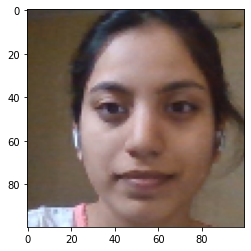

In [ ]:
plt.imshow(img)

In [ ]:
img.numpy().min()

0.06127451

In [ ]:
# dataset.map(preprocess)

In [ ]:
# (anchor, positive) => 1,1,1,1,1
# (anchor, negative) => 0,0,0,0,0

In [ ]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [ ]:
samples = data.as_numpy_iterator()

In [ ]:
exampple = samples.next()

In [ ]:
exampple

(b'/content/drive/MyDrive/data/anchor/4199c19b-b5fe-11ed-b4b0-97e548441b72.jpg',
 b'/content/drive/MyDrive/data/positive/8b3dbf25-b5fe-11ed-a08d-97e548441b72.jpg',
 1.0)

# 3.4 Build Train and Test Partition


In [ ]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [ ]:
res = preprocess_twin(*exampple)

In [ ]:
# res

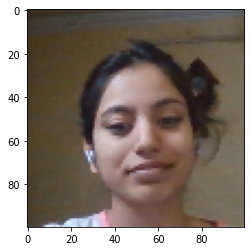

In [ ]:
plt.imshow(res[1])

In [ ]:
res[2]

1.0

In [ ]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=10000)

In [ ]:
# Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [ ]:
# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

# 4. Model Engineering
4.1 Build Embedding Layer

In [ ]:
inp = Input(shape=(100,100,3), name='input_image')
c1 = Conv2D(64, (10,10), activation='relu')(inp)
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
c2 = Conv2D(128, (7,7), activation='relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
c4 = Conv2D(256, (4,4), activation='relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096, activation='sigmoid')(f1)
mod = Model(inputs=[inp], outputs=[d1], name='embedding')

In [ ]:
mod.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 128)       26

In [ ]:
def make_embedding(): 
    inp = Input(shape=(100,100,3), name='input_image')
    
    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    # Third block 
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [ ]:
embedding = make_embedding()

In [ ]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 46, 46, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 20, 20, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 17, 17, 128)       26

# 4.2 Build Distance Layer

In [ ]:
# Siamese L1 Distance class
class L1Dist(Layer):
    
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
       
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [ ]:
l1 = L1Dist()

In [ ]:
# l1(anchor_embedding, validation_embedding)

# 4.3 Make Siamese Model

In [ ]:
input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)
siamese_layer = L1Dist()
distances = siamese_layer(inp_embedding, val_embedding)
classifier = Dense(1, activation='sigmoid')(distances)
classifier

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2')>

In [ ]:
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [ ]:
siamese_network.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

In [ ]:
def make_siamese_model(): 
    
    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))
    
    # Validation image in the network 
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [ ]:
siamese_model = make_siamese_model()

In [ ]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

# 5. Training
5.1 Setup Loss and Optimizer

In [ ]:
binary_cross_loss = tf.losses.BinaryCrossentropy()
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001

5.2 Establish Checkpoints

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

# 5.3 Build Train Step Function

In [ ]:
test_batch = train_data.as_numpy_iterator()
batch_1 = test_batch.next()
X = batch_1[:2]
y = batch_1[2]

In [ ]:
y

array([1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.],
      dtype=float32)

In [ ]:
@tf.function
def train_step(batch):
    
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
        
    # Return loss
    return loss

# 5.4 Build Training Loop

In [ ]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [ ]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Creating a metric object 
        r = Recall()
        p = Precision()
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            loss = train_step(batch)
            yhat = siamese_model.predict(batch[:2])
            r.update_state(batch[2], yhat)
            p.update_state(batch[2], yhat) 
            progbar.update(idx+1)
        print(loss.numpy(), r.result().numpy(), p.result().numpy())
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

# 5.5 Train the model

In [ ]:
EPOCHS = 50

In [ ]:
train(train_data, EPOCHS)


 Epoch 1/50
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
27/27 [==============================] - 22s 352ms/step
0.25077114 0.7058824 0.96644294

 Epoch 2/50
27/27 [==============================] - 9s 332ms/step
0.02389922 0.94258374 0.98994976

 Epoch 3/50
27/27 [==============================] - 8s 302ms/step
0.06862615 0.9386792 0.995

 Epoch 4/50
27/27 [==============================] - 8s 310ms/step
0.05732295 0.9238095 0.9948718

 Epoch 5/50
27/27 [==============================] - 9s 331ms/step
0.06499423 0.95348835 0.9855769

 Epoch 6/50
27/27 [==============================] - 8s 293ms/step
0.079174876 0.98086125 1.0

 Epoch 7/50
27/27 [==============================] - 8s 303ms/step
0.009004337 0.9902439 1.0

 Epoch 8/50
27/27 [==============================] - 8s 295ms/step
0.0106326835 1.0 1.0

 Epoch 9/50
27/27 [==============================] - 8s 310ms/step
0.25

# 6. Evaluate Model

6.1 Import Metrics

In [ ]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

6.2 Make Predictions

In [ ]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [ ]:
# Make predictions
y_hat = siamese_model.predict([test_input, test_val])
y_hat

1/1 [==============================] - 0s 26ms/step


array([[1.0000000e+00],
       [9.9841750e-01],
       [3.1448806e-09],
       [1.9820078e-08],
       [6.9158910e-09],
       [2.5267292e-07],
       [1.0000000e+00],
       [9.9999809e-01],
       [2.1842498e-06],
       [1.0000000e+00],
       [3.8519890e-10],
       [1.0000000e+00],
       [9.9999237e-01],
       [9.9963605e-01],
       [2.6486501e-05],
       [4.0256736e-04]], dtype=float32)

In [ ]:
# Post processing the results 
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0]

In [ ]:
y_true

array([1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0.],
      dtype=float32)

6.3 Calculate Metrics

In [ ]:
# Creating a metric object 
m = Recall()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [ ]:
# Creating a metric object 
m = Precision()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

6.4 Viz Results

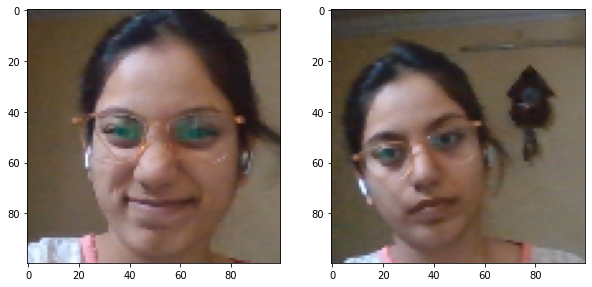

In [ ]:
# Set plot size 
plt.figure(figsize=(10,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[0])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[0])

# Renders cleanly
plt.show()

7. Save Model

In [ ]:
# Save weights
siamese_model.save('siamesemodel.h5')

In [ ]:
L1Dist

__main__.L1Dist

In [ ]:
# Reload model 
model = tf.keras.models.load_model('siamesemodel.h5', 
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy},compile = False)

In [ ]:
# Make predictions with reloaded model
model.predict([test_input, test_val])

1/1 [==============================] - 0s 133ms/step


array([[1.0000000e+00],
       [9.9841750e-01],
       [3.1448806e-09],
       [1.9820078e-08],
       [6.9158910e-09],
       [2.5267292e-07],
       [1.0000000e+00],
       [9.9999809e-01],
       [2.1842498e-06],
       [1.0000000e+00],
       [3.8519890e-10],
       [1.0000000e+00],
       [9.9999237e-01],
       [9.9963605e-01],
       [2.6486501e-05],
       [4.0256736e-04]], dtype=float32)

In [ ]:
# View model summary
model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

# 8. Real Time Test

8.1 Verification Function

In [ ]:
# application_data\verification_images

In [ ]:
# /content/drive/MyDrive/application_data

In [ ]:
os.listdir(os.path.join('/content/drive/MyDrive/application_data', 'verification_images'))


['Copy of 0c014c09-b5fe-11ed-80e2-97e548441b72.jpg',
 'Copy of 0af4a76d-b5fe-11ed-a078-97e548441b72.jpg',
 'Copy of 0a214925-b5fe-11ed-b2cd-97e548441b72.jpg',
 'Copy of 0c94d51d-b5fe-11ed-a158-97e548441b72.jpg',
 'Copy of 0b454a8a-b5fe-11ed-aa59-97e548441b72.jpg',
 'Copy of 0ca3217e-b5fe-11ed-9dfe-97e548441b72.jpg',
 'Copy of 0b6b401d-b5fe-11ed-9c5d-97e548441b72.jpg',
 'Copy of 0b95de61-b5fe-11ed-8969-97e548441b72.jpg',
 'Copy of 0c24b3f2-b5fe-11ed-bf54-97e548441b72.jpg',
 'Copy of 0c414954-b5fe-11ed-8844-97e548441b72.jpg',
 'Copy of 0d38a257-b5fe-11ed-9246-97e548441b72.jpg',
 'Copy of 0d14dabc-b5fe-11ed-8bac-97e548441b72.jpg',
 'Copy of 0cc6a301-b5fe-11ed-83ca-97e548441b72.jpg',
 'Copy of 0d06a33b-b5fe-11ed-9a48-97e548441b72.jpg',
 'Copy of 0d7df48b-b5fe-11ed-b3d6-97e548441b72.jpg',
 'Copy of 0cb874e6-b5fe-11ed-9ac7-97e548441b72.jpg',
 'Copy of 0cf8abcb-b5fe-11ed-b8e8-97e548441b72.jpg',
 'Copy of 0cd9b1b0-b5fe-11ed-982a-97e548441b72.jpg',
 'Copy of 0d46c903-b5fe-11ed-bd7f-97e548441b72

In [ ]:
os.path.join('/content/drive/MyDrive/application_data', 'input_image', 'input_image.jpg')

'/content/drive/MyDrive/application_data/input_image/input_image.jpg'

In [ ]:
for image in os.listdir(os.path.join('/content/drive/MyDrive/application_data', 'verification_images')):
    validation_img = os.path.join('/content/drive/MyDrive/application_data', 'verification_images', image)
    print(validation_img)

/content/drive/MyDrive/application_data/verification_images/Copy of 0c014c09-b5fe-11ed-80e2-97e548441b72.jpg
/content/drive/MyDrive/application_data/verification_images/Copy of 0af4a76d-b5fe-11ed-a078-97e548441b72.jpg
/content/drive/MyDrive/application_data/verification_images/Copy of 0a214925-b5fe-11ed-b2cd-97e548441b72.jpg
/content/drive/MyDrive/application_data/verification_images/Copy of 0c94d51d-b5fe-11ed-a158-97e548441b72.jpg
/content/drive/MyDrive/application_data/verification_images/Copy of 0b454a8a-b5fe-11ed-aa59-97e548441b72.jpg
/content/drive/MyDrive/application_data/verification_images/Copy of 0ca3217e-b5fe-11ed-9dfe-97e548441b72.jpg
/content/drive/MyDrive/application_data/verification_images/Copy of 0b6b401d-b5fe-11ed-9c5d-97e548441b72.jpg
/content/drive/MyDrive/application_data/verification_images/Copy of 0b95de61-b5fe-11ed-8969-97e548441b72.jpg
/content/drive/MyDrive/application_data/verification_images/Copy of 0c24b3f2-b5fe-11ed-bf54-97e548441b72.jpg
/content/drive/MyDr

In [ ]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('/content/drive/MyDrive/application_data', 'verification_images')):
        input_img = preprocess(os.path.join('/content/drive/MyDrive/application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('/content/drive/MyDrive/application_data', 'verification_images', image))
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Detection Threshold: Metric above which a prediciton is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(os.path.join('/content/drive/MyDrive/application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified

Real time

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='/content/drive/MyDrive/application_data/input_data/input_image.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to /content/drive/MyDrive/application_data/input_data/input_image.jpg


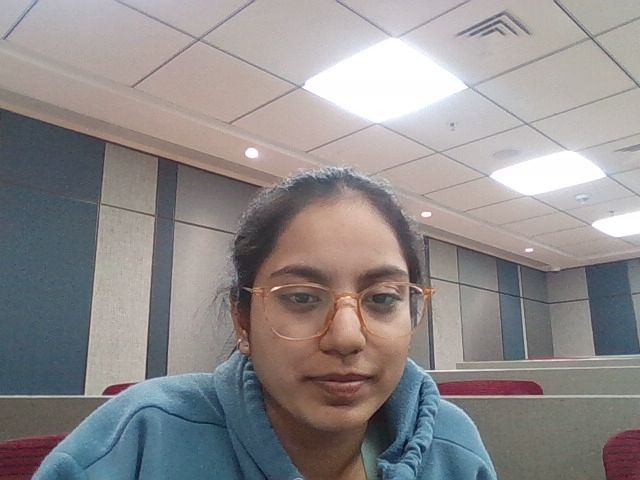

In [ ]:
from IPython.display import Image
try:
  
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
results, verified = verify(model, 0.9, 0.7)
print(verified)

NotFoundError: ignored

In [ ]:
# cap = cv2.VideoCapture(4)
# while cap.isOpened():
#     ret, frame = cap.read()
#     frame = frame[120:120+250,200:200+250, :]
    
#     cv2.imshow('Verification', frame)
    
#     # Verification trigger
#     if cv2.waitKey(10) & 0xFF == ord('v'):
#         # Save input image to application_data/input_image folder 
#         cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
#         # Run verification
#         results, verified = verify(model, 0.9, 0.7)
#         print(verified)
    
#     if cv2.waitKey(10) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()